# **Author: Kuan-Chen Chen**
# **Project: Bulls and Cows Game with Entropy**
## Exam 3 For Mathematical Foundations for Data Science

#0. Prepare the envioment
## We are going to import the  library that we going to use for this program.
1. Numpy: For calculate the log for the entropy (we can also use math instead)  
2. random: For generate the random number for the user to guess
3. matplotlib: For visualize how the entropy decrease after the guess.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
!python -V

Python 3.10.12


In [ ]:
np.__version__

'1.26.4'

In [ ]:
import matplotlib
matplotlib.__version__

'3.8.0'

# 1. Define the Functions
## We have to define different functions and at the end we going to put them together at main()
1. get_all_valid_numbers(): Puts all the possible number in a empty list
2. random_num(): For generate the random number for the user to guess and the first digit can be zero and all the digits must not repeat

3. user_num(): To let the user input their guess, and we also check that the input must be valid, if the input is invalid, the loop will start again.

4. check_num(num, user) : Return the numbers of Bulls and Cows.

5. entropy (a,b): The numbers of Bulls and Cows will generate a entropy(each guess)

6. plot_entropy(entropy_history, rounds): We need two list and this function will plot the changes of the entropy.




In [ ]:
def get_all_valid_numbers():
    valid_numbers = []
    for i in range(10):
        for j in range(10):
            for k in range(10):
                for l in range(10):
                    if len({i, j, k, l}) == 4: # If 4 digits are all different
                        valid_numbers.append((i, j, k, l))  # Then the number will be add in valid_numbers
    return valid_numbers

In [ ]:
def random_num():
  num = random.sample(range(10), 4) # Generate a number that 4 digits are all different
  return list(map(str, num))

In [ ]:
def user_num():
  while True:
    user_num = input("Enter a positive 4-digit number and the digits must be all different: \n")
    if not user_num:
      print("Please enter a valid number")
      continue
      # must have input

    if not user_num.isdigit():
      print("Your input must be a valid number")
      continue
      # input must be number

    if int(user_num) >= 0:
      user = list(user_num)
      if len(set(user)) != len(user):
          print("Your input have to be all different")
      #check that the input digits are different

      else:
        if len(user) != 4:
          print("Your input have to be 4-digit")
        # Check that the input are 4 digits
        else:
          return user
          break


In [ ]:
def check_num(num, user):
  a = 0
  b = 0
  for i in range(4): # check each number 1 by 1 by order
    if num[i] in user:
      b += 1 # if our input (by digit) is in the answer,then b plus 1 (no matter whether the number is in the right position)
      if num[i] == user[i]: #if the digit is in the right place, a plus 1 and b minus 1( this can let b only be the amount of right number but wrong place)
        a += 1
        b -= 1
  return a, b

In [ ]:
def entropy (a,b):
  remaining_counts  = {  # I calculate them all by myself so I want them exsit
        (0, 0): 360,
        (0, 1): 1440,
        (0, 2): 1260,
        (0, 3): 264,
        (0, 4): 9,
        (1, 0): 480,
        (1, 1): 720,
        (1, 2): 216,
        (1, 3): 8,
        (2, 0): 180,
        (2, 1): 72,
        (2, 2): 6,
        (3, 0): 24,
        (3, 1): 0,
        (4, 0): 1
    }
  prop = remaining_counts.get((a, b), 0) / 5040  #5040 is 10 * 9 * 8 *7

  return  round(prop * np.log2(1 / prop), 5) #entropy function


In [ ]:
def plot_entropy(entropy_history, rounds):

    plt.clf()
    plt.figure(figsize=(7.5, 4.5))
    plt.plot(rounds, entropy_history, 'bo-', linewidth=2, markersize=8)
    plt.fill_between(rounds, entropy_history, alpha=0.2)

    plt.title('Entropy Reduction Over Rounds', fontsize=14)
    plt.xlabel('Round', fontsize=12)
    plt.ylabel('Entropy (bits)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)


    for i, entropy in enumerate(entropy_history):
        plt.annotate(f'{entropy:.3f}',
                    (rounds[i], entropy),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show(block=False)
    plt.pause(0.1)

# 2. Put them together

In [ ]:
def main():
  while True:
      num = random_num() #the answer
      a = 0
      r = 0 #the round that we guess
      print("Welcome to the Cows and Bulls Game!")


      possible_numbers = get_all_valid_numbers() #all possible numbers
      initial_entropy = np.log2(len(possible_numbers)) # the entropy before we guess
      print(f"Initial entropy: {initial_entropy:} bits")

      entropy_history = [initial_entropy] #list
      rounds = [0]   #list for the picture
      plot_entropy(entropy_history, rounds) #the picture at first

      while a != 4: # The loop will end when we get the final answer
          r = r + 1

          print(f"Round {r}")
          user = user_num() #the input
          a, b = check_num(num, user) #the Bulls and Cows
          print(f"Theres {a} Bull(s) and {b} Cow(s)!\n")

          single_ent=entropy(a,b)
          print(f"Single guess entropy: {single_ent:} bits")

          possible_numbers = [n for n in possible_numbers
                            if check_num(list(map(str, n)), user) == (a, b)]
          # For example we play this game on only 2 digits and 10 is 0B1C and the possible answers is
          # 02 03 04 05 06 07 08 09
          # 21 31 41 51 61 71 81 91
          # Because these number with 10 is also 0B1C, it means that the ture answer must be inside the remain possible numbers.
          # We run all the remain possible number, and compare the guess and the remain numbers, if the number also have same B and C with we guess, then the numbers will be add into a "New" possible_numbers


          if possible_numbers:
              remaining_entropy = np.log2(len(possible_numbers)) #entropy left

          else:
              remaining_entropy = 0

          entropy_reduction = initial_entropy - remaining_entropy #entropy reduce
          print(f"Possible numbers: {len(possible_numbers)}")
          print(f"Remaining entropy: {remaining_entropy:} bits")
          print(f"Entropy reduction: {entropy_reduction:} bits\n\n")

          entropy_history.append(remaining_entropy) # add to the list for picture
          rounds.append(r) # add to the list for picture
          plot_entropy(entropy_history, rounds)


      print(f"You win! {user} is the Answer")
      break

Welcome to the Cows and Bulls Game!
Initial entropy: 12.29920801838728 bits


<Figure size 640x480 with 0 Axes>

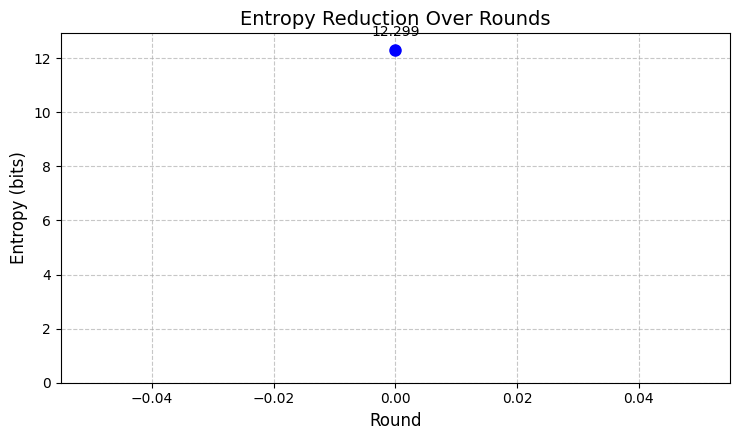

Round 1
Enter a positive 4-digit number and the digits must be all different: 
00000
Your input have to be all different
Enter a positive 4-digit number and the digits must be all different: 
12345
Your input have to be 4-digit
Enter a positive 4-digit number and the digits must be all different: 
0123
Theres 2 Bull(s) and 1 Cow(s)!

Single guess entropy: 0.08756 bits
Possible numbers: 72
Remaining entropy: 6.169925001442312 bits
Entropy reduction: 6.129283016944967 bits




<Figure size 640x480 with 0 Axes>

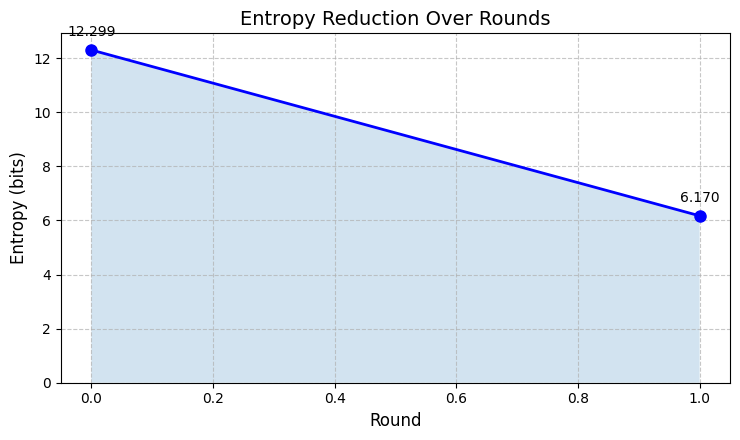

Round 2
Enter a positive 4-digit number and the digits must be all different: 
4567
Theres 0 Bull(s) and 1 Cow(s)!

Single guess entropy: 0.51639 bits
Possible numbers: 36
Remaining entropy: 5.169925001442312 bits
Entropy reduction: 7.129283016944967 bits




<Figure size 640x480 with 0 Axes>

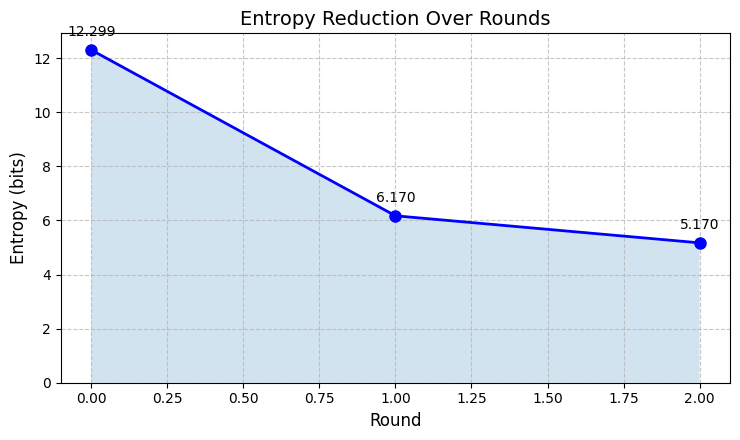

Round 3
Enter a positive 4-digit number and the digits must be all different: 
8945
Theres 0 Bull(s) and 1 Cow(s)!

Single guess entropy: 0.51639 bits
Possible numbers: 12
Remaining entropy: 3.584962500721156 bits
Entropy reduction: 8.714245517666123 bits




<Figure size 640x480 with 0 Axes>

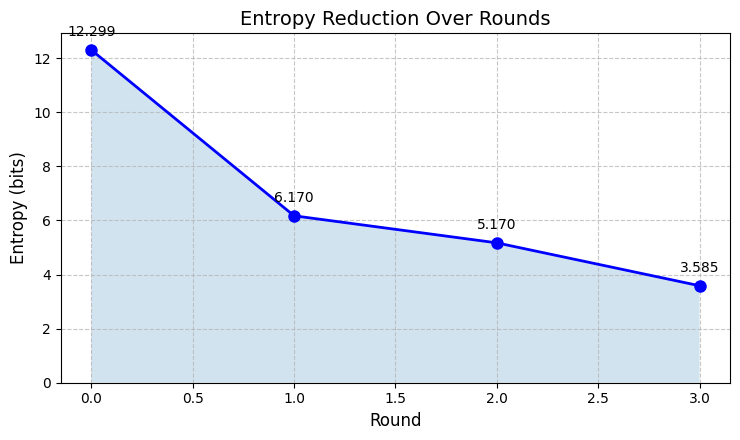

Round 4
Enter a positive 4-digit number and the digits must be all different: 
8967
Theres 0 Bull(s) and 0 Cow(s)!

Single guess entropy: 0.27195 bits
Possible numbers: 12
Remaining entropy: 3.584962500721156 bits
Entropy reduction: 8.714245517666123 bits




<Figure size 640x480 with 0 Axes>

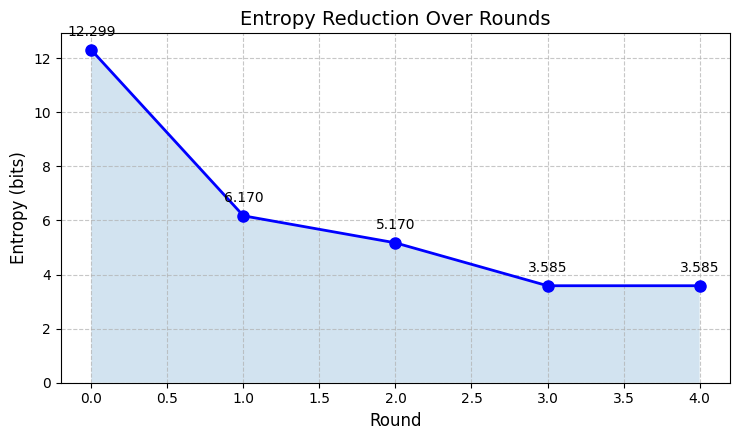

Round 5
Enter a positive 4-digit number and the digits must be all different: 
8975
Theres 0 Bull(s) and 0 Cow(s)!

Single guess entropy: 0.27195 bits
Possible numbers: 6
Remaining entropy: 2.584962500721156 bits
Entropy reduction: 9.714245517666123 bits




<Figure size 640x480 with 0 Axes>

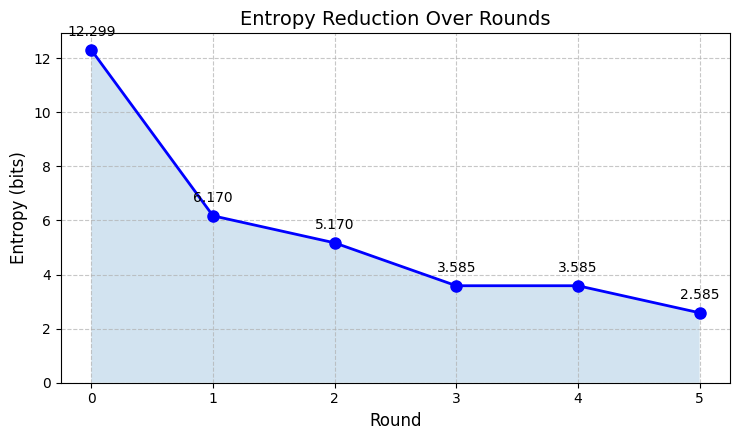

Round 6
Enter a positive 4-digit number and the digits must be all different: 
0124
Theres 3 Bull(s) and 0 Cow(s)!

Single guess entropy: 0.03673 bits
Possible numbers: 3
Remaining entropy: 1.584962500721156 bits
Entropy reduction: 10.714245517666123 bits




<Figure size 640x480 with 0 Axes>

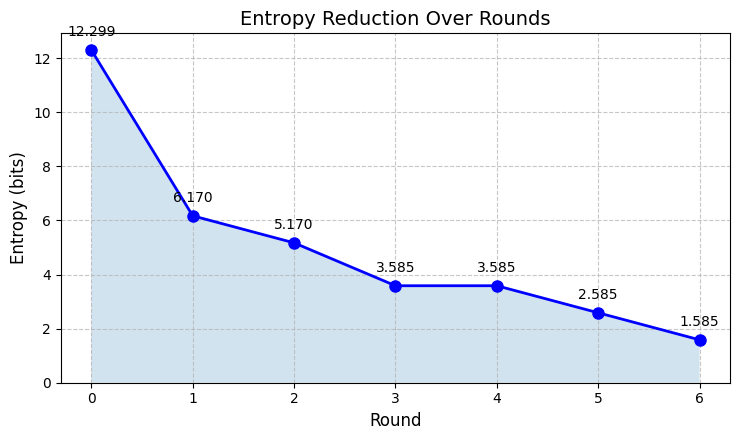

Round 7
Enter a positive 4-digit number and the digits must be all different: 
0134
Theres 2 Bull(s) and 1 Cow(s)!

Single guess entropy: 0.08756 bits
Possible numbers: 2
Remaining entropy: 1.0 bits
Entropy reduction: 11.29920801838728 bits




<Figure size 640x480 with 0 Axes>

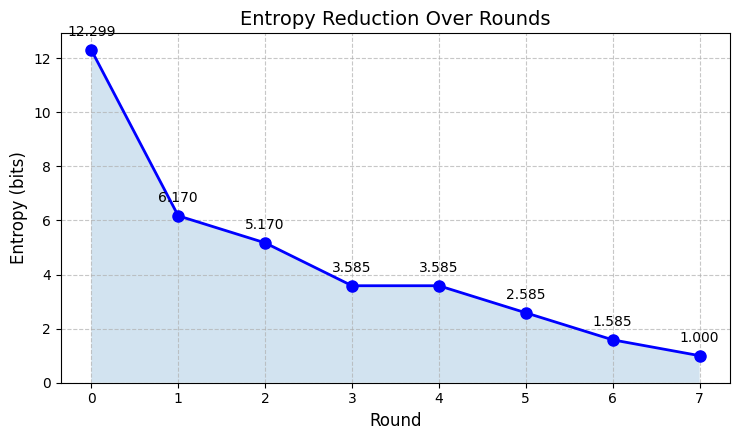

Round 8
Enter a positive 4-digit number and the digits must be all different: 
1234
Theres 1 Bull(s) and 3 Cow(s)!

Single guess entropy: 0.01476 bits
Possible numbers: 1
Remaining entropy: 0.0 bits
Entropy reduction: 12.29920801838728 bits




<Figure size 640x480 with 0 Axes>

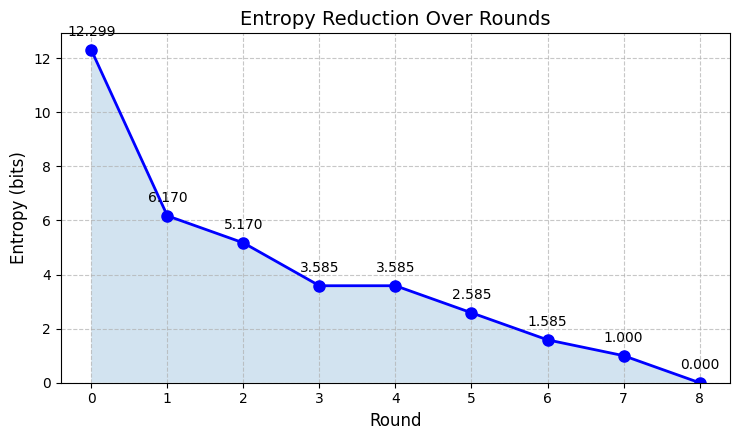

Round 9
Enter a positive 4-digit number and the digits must be all different: 
4123
Theres 2 Bull(s) and 2 Cow(s)!

Single guess entropy: 0.01156 bits
Possible numbers: 1
Remaining entropy: 0.0 bits
Entropy reduction: 12.29920801838728 bits




<Figure size 640x480 with 0 Axes>

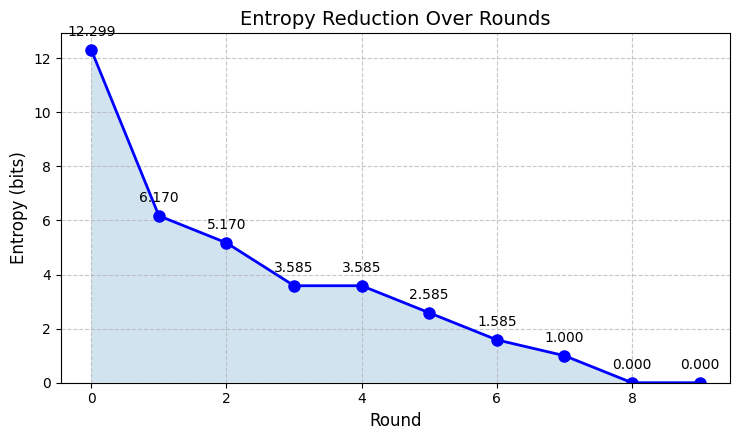

Round 10
Enter a positive 4-digit number and the digits must be all different: 
4213
Theres 0 Bull(s) and 4 Cow(s)!

Single guess entropy: 0.0163 bits
Possible numbers: 1
Remaining entropy: 0.0 bits
Entropy reduction: 12.29920801838728 bits




<Figure size 640x480 with 0 Axes>

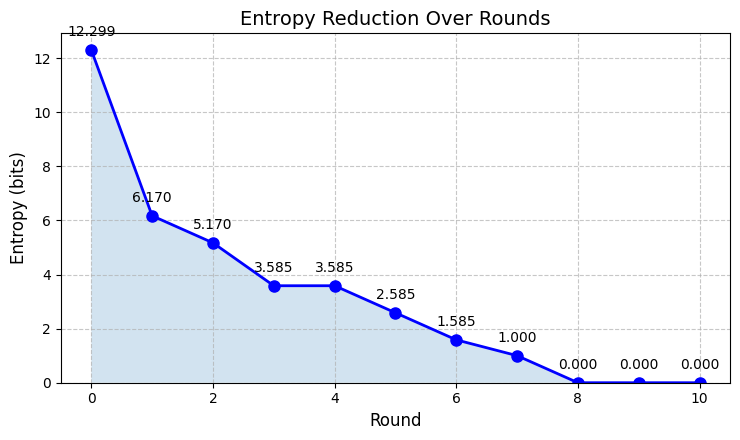

Round 11
Enter a positive 4-digit number and the digits must be all different: 
3124
Theres 4 Bull(s) and 0 Cow(s)!

Single guess entropy: 0.00244 bits
Possible numbers: 1
Remaining entropy: 0.0 bits
Entropy reduction: 12.29920801838728 bits




<Figure size 640x480 with 0 Axes>

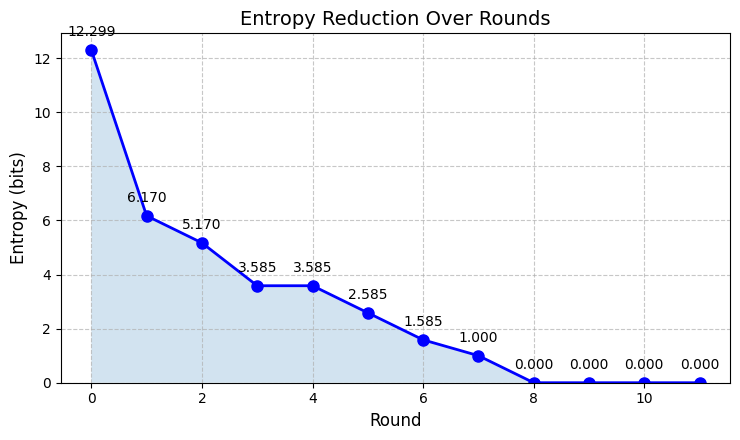

You win! ['3', '1', '2', '4'] is the Answer

Another game? Enter Y or y for yes.
n


In [ ]:
repeat = 'yes'
while repeat[0].lower() == 'y':
  main()
  repeat = input("\nAnother game? Enter Y or y for yes.\n")
  # The repeat of the game.